## 303. 区域和检索 - 数组不可变

给定一个整数数组  `nums`，求出数组从索引 `i` 到 `j`（`i ≤ j`）范围内元素的总和，包含 `i、j` 两点。

实现 `NumArray` 类：

`NumArray(int[] nums)` 使用数组 `nums` 初始化对象
`int sumRange(int i, int j)` 返回数组 `nums` 从索引 `i` 到 `j`（i ≤ j）范围内元素的总和，包含 `i、j` 两点（也就是 `sum(nums[i], nums[i + 1], ... , nums[j])）`

示例：
```
输入：
["NumArray", "sumRange", "sumRange", "sumRange"]
[[[-2, 0, 3, -5, 2, -1]], [0, 2], [2, 5], [0, 5]]
输出：
[null, 1, -1, -3]


解释：
NumArray numArray = new NumArray([-2, 0, 3, -5, 2, -1]);
numArray.sumRange(0, 2); // return 1 ((-2) + 0 + 3)
numArray.sumRange(2, 5); // return -1 (3 + (-5) + 2 + (-1)) 
numArray.sumRange(0, 5); // return -3 ((-2) + 0 + 3 + (-5) + 2 + (-1))
 ```

提示：

- 0 <= nums.length <= 104
- -105 <= nums[i] <= 105
- 0 <= i <= j < nums.length
- 最多调用 104 次 sumRange 方法


由于会进行多次检索，即多次调用 $\text{sumRange}$，因此为了降低检索的总时间，应该降低 $\text{sumRange}$ 的时间复杂度，最理想的情况是时间复杂度 $O(1)$。为了将检索的时间复杂度降到 $O(1)$，需要在初始化的时候进行预处理。

注意到当 $i \le j$ 时，$\text{sumRange}(i,j)$ 可以写成如下形式：
$$
\text{sumRange(i, j)}\\
= \sum_{k=i}^j nums[k] \\
= \sum_{k=0}^j nums[k] - \sum_{k=0}^{i-1} nums[k] 
$$

由此可知，要计算 $\text{sumRange}(i,j)$，则需要计算数组 $\textit{nums}$在下标 $j$ 和下标 $i-1$ 的前缀和，然后计算两个前缀和的差。

如果可以在初始化的时候计算出数组 $\textit{nums}$ 在每个下标处的前缀和，即可满足每次调用 $\text{sumRange}$ 的时间复杂度都是 $O(1)$。


具体实现方面，假设数组 $\textit{nums}$ 的长度为 $n$，创建长度为 $n+1$ 的前缀和数组 $\textit{sums}$，对于 $0 \le i<n$ 都有 $\textit{sums}[i+1]=\textit{sums}[i]+\textit{nums}[i]$，则当 $0<i \le n$时，$\textit{sums}[i]$ 表示数组 $\textit{nums}$ 从下标 $0$ 到下标 $i-1$ 的前缀和。

将前缀和数组 $\textit{sums}$ 的长度设为 $n+1$ 的目的是为了方便计算 $\text{sumRange}(i,j)$)，不需要对 $i=0$ 的情况特殊处理。此时有
$$
\text{sumRange}(i,j) = sums[j+1] - sums[i]
$$

In [ ]:
class NumArray:

    def __init__(self, nums: List[int]):
        self.sums = [0]
        _sums = self.sums

        for num in nums:
            _sums.append(_sums[-1] + num)

    def sumRange(self, i: int, j: int) -> int:
        _sums = self.sums
        return _sums[j + 1] - _sums[i]


# Your NumArray object will be instantiated and called as such:
# obj = NumArray(nums)
# param_1 = obj.sumRange(i,j)

## 304. 二维区域和检索 - 矩阵不可变

给定一个二维矩阵，计算其子矩形范围内元素的总和，该子矩阵的左上角为 (row1, col1) ，右下角为 (row2, col2) 。
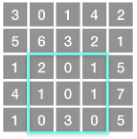

上图子矩阵左上角 (row1, col1) = (2, 1) ，右下角(row2, col2) = (4, 3)，该子矩形内元素的总和为 8。

示例：
```
给定 matrix = [
  [3, 0, 1, 4, 2],
  [5, 6, 3, 2, 1],
  [1, 2, 0, 1, 5],
  [4, 1, 0, 1, 7],
  [1, 0, 3, 0, 5]
]

sumRegion(2, 1, 4, 3) -> 8
sumRegion(1, 1, 2, 2) -> 11
sumRegion(1, 2, 2, 4) -> 12
```

提示：

你可以假设矩阵不可变。
会多次调用 sumRegion 方法。
你可以假设 row1 ≤ row2 且 col1 ≤ col2 。


###  解题思路

**题型**：初始化一次、检索多次

**秘诀**：在初始化的时候做预处理。

今天的题目是 `303. 区域和检索 - 数组不可变` 的升级版。

同样地，仍然用 preSum（前缀和）求解，包括两个步骤:

#### 步骤一：求 preSum
求出二维空间的 `preSum[i][j]`


定义 `preSum[i][j]`表示 从 $[0,0]$ 位置到 $[i,j]$ 位置的子矩形所有元素之和

$$
S(O,D) = S(O, C) + S(O, B) - S(O,A) + D
$$
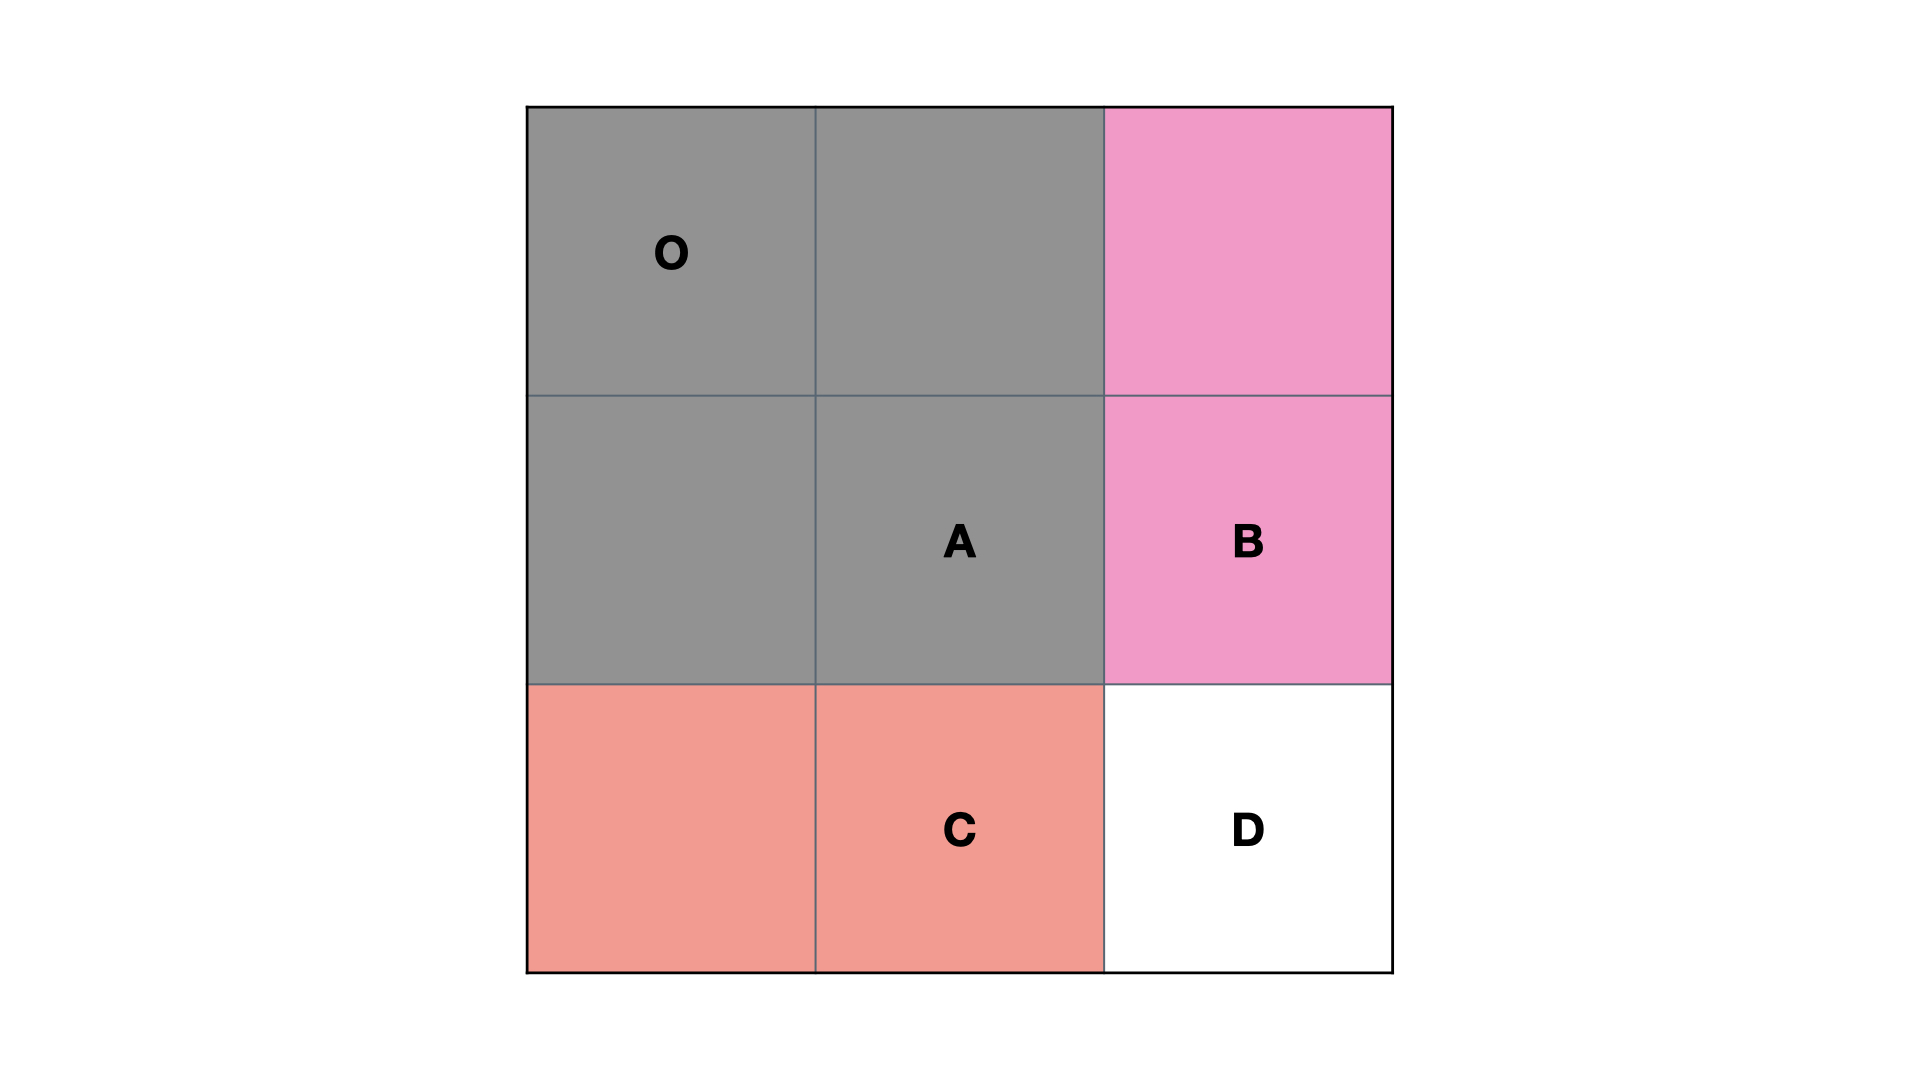

如果求 `preSum[i][j]` 表示的话，对应了以下的递推公式：
$$
preSum[i][j] = preSum[i - 1][j] + preSum[i][j - 1] - preSum[i - 1][j - 1] + matrix[i][j]
$$


#### 步骤二：根据 preSum 求子矩形面积

利用 `preSum[i][j]` 来快速求出任意子矩形的面积。

$$
S(A,D) = S(O, D) - S(O, E) - S(O,F) + S(O, G)
$$
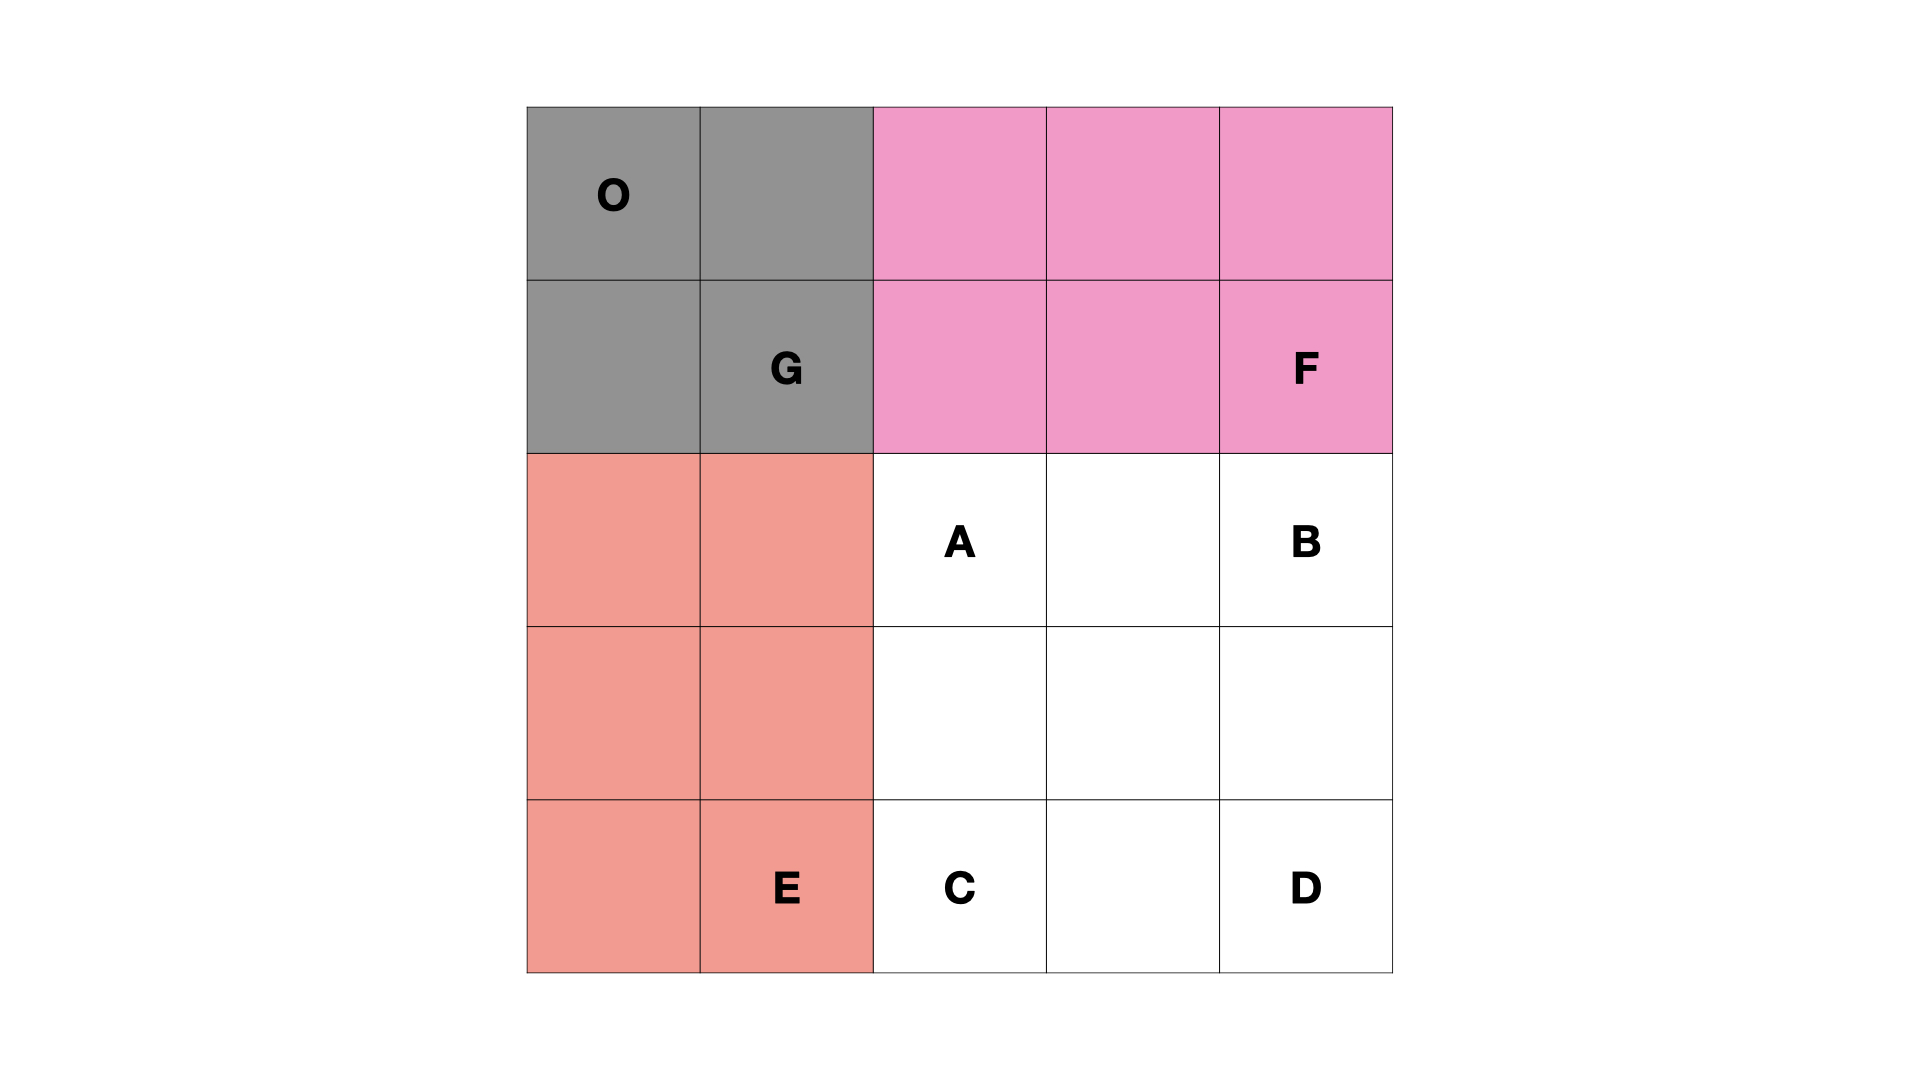

如果要求 `[row1, col1]` 到 `[row2, col2]` 的子矩形的面积的话，用 `preSum` 对应了以下的递推公式：
$$
preSum[row2][col2] - preSum[row2][col1 - 1] - preSum[row1 - 1][col2] + preSum[row1 - 1][col1 - 1]
$$

#### 代码部分：
代码实现的时候，使用的 preSum 比原矩阵 matrix 多了一行一列，是为了让第 0 行与第 0 列的元素也能使用上面的递推公式。如果 preSum 矩阵大小和 martix 大小相等，则需要对第 0 行与第 0 列特殊判断。


In [ ]:
class NumMatrix:

    def __init__(self, matrix: List[List[int]]):
        if not matrix or not matrix[0]:
            M, N = 0, 0
        else:
            M, N = len(matrix), len(matrix[0])
        self.preSum = [[0] * (N + 1) for _ in range(M + 1)]
        for i in range(M):
            for j in range(N):
                self.preSum[i + 1][j + 1] = self.preSum[i][j + 1] + self.preSum[i + 1][j]  - self.preSum[i][j] + matrix[i][j]


    def sumRegion(self, row1: int, col1: int, row2: int, col2: int) -> int:
        return self.preSum[row2 + 1][col2 + 1] - self.preSum[row2 + 1][col1] - self.preSum[row1][col2 + 1] + self.preSum[row1][col1]


# Your NumMatrix object will be instantiated and called as such:
# obj = NumMatrix(matrix)
# param_1 = obj.sumRegion(row1,col1,row2,col2)

## 33. 搜索旋转排序数组

整数数组 `nums` 按升序排列，数组中的值 互不相同 。

在传递给函数之前，`nums` 在预先未知的某个下标 `k`$（0 <= k < nums.length）$上进行了 旋转，使数组变为 `[nums[k], nums[k+1], ..., nums[n-1], nums[0], nums[1], ..., nums[k-1]]`（下标 从 0 开始 计数）。例如， `[0,1,2,4,5,6,7]` 在下标 3 处经旋转后可能变为 `[4,5,6,7,0,1,2]` 。

给你 旋转后 的数组 nums 和一个整数 target ，如果 nums 中存在这个目标值 target ，则返回它的下标，否则返回 -1 。

示例 1：
```
输入：nums = [4,5,6,7,0,1,2], target = 0
输出：4
```
示例 2：
```
输入：nums = [4,5,6,7,0,1,2], target = 3
输出：-1
```
示例 3：
```
输入：nums = [1], target = 0
输出：-1
```


提示：
```
1 <= nums.length <= 5000
-10^4 <= nums[i] <= 10^4
nums 中的每个值都 独一无二
题目数据保证 nums 在预先未知的某个下标上进行了旋转
-10^4 <= target <= 10^4
```

将数组从中间分开成左右两部分的时候，一定有一部分的数组是有序的

从 6 这个位置分开以后数组变成了 `[4, 5, 6]` 和 `[7, 0, 1, 2]` 两个部分 (前者有序)

根据有序的那部分判断出 `target` 在不在这个部分：

如果 `[l, mid - 1]` 是有序数组，且 target 的大小满足 $[\textit{nums}[l],\textit{nums}[mid])$，则我们应该将搜索范围缩小至 `[l, mid - 1]`，否则在 `[mid + 1, r]` 中寻找。

如果 `[mid, r]` 是有序数组，且 `target ` 的大小满足 $(\textit{nums}[mid+1],\textit{nums}[r]]$，则我们应该将搜索范围缩小至 `[mid + 1, r]`，否则在 `[l, mid - 1]` 中寻找。


In [ ]:
from typing import List
class Solution:
    def search(self, nums: List[int], target: int) -> int:
        if not nums:
            return -1
        l, r = 0, len(nums) - 1
        while l <= r:
            mid = (r + l) // 2
            # if the divided number is just the target
            if nums[mid] == target:
                return mid
            
            if nums[l] <= nums[mid]:   # left list ordered
                if nums[l]<=target and nums[mid]>target:
                    r = mid - 1
                else:
                    l = mid + 1
            elif nums[mid] <= nums[r]:   # right list ordered
                if nums[mid]<target and nums[r]>=target:
                    l = mid + 1
                else:
                    r = mid - 1
        return -1
    

In [1]:
### ss = Solution()
nums = [3,1]
target = 1
idx = ss.search(nums, target)
print(idx)

NameError: name 'ss' is not defined

复杂度分析

时间复杂度： $O(\log n)$，其中 $n$ 为 $\textit{nums}$ 数组的大小。整个算法时间复杂度即为二分查找的时间复杂度 $O(\log n)$。

空间复杂度： $O(1)$ 。我们只需要常数级别的空间存放变量


## 81. 搜索旋转排序数组 II

已知存在一个按非降序排列的整数数组 nums ，数组中的值不必互不相同。

在传递给函数之前，nums 在预先未知的某个下标 k（0 <= k < nums.length）上进行了 旋转 ，使数组变为 `[nums[k], nums[k+1], ..., nums[n-1], nums[0], nums[1], ..., nums[k-1]]`（下标 从 0 开始 计数）。例如， `[0,1,2,4,4,4,5,6,6,7]` 在下标 5 处经旋转后可能变为 `[4,5,6,6,7,0,1,2,4,4]` 。

给你 旋转后 的数组 `nums` 和一个整数 `target` ，请你编写一个函数来判断给定的目标值是否存在于数组中。如果 `nums` 中存在这个目标值 ` target` ，则返回 `true` ，否则返回 `false` 。

示例 1：
```
输入：nums = [2,5,6,0,0,1,2], target = 0
输出：true
```

示例 2：
```
输入：nums = [2,5,6,0,0,1,2], target = 3
输出：false
```

提示：
```
1 <= nums.length <= 5000
-104 <= nums[i] <= 104
题目数据保证 nums 在预先未知的某个下标上进行了旋转
-104 <= target <= 104
```


In [2]:
from typing import List

class Solution:
    def search(self, nums: List[int], target: int) -> bool:
        try: 
            res = nums.index(target)
            return True
        except:
            return False

In [3]:
ss = Solution()
nums = [2,5,6,0,0,1,2]
target = 7
res = ss.search(nums, target)
print(res)

False


### 方法一：二分查找


## 153. 寻找旋转排序数组中的最小值
已知一个长度为 `n` 的数组，预先按照升序排列，经由 `1` 到 `n` 次 旋转 后，得到输入数组。例如，原数组 `nums = [0,1,2,4,5,6,7]` 在变化后可能得到：

若旋转 4 次，则可以得到 `[4,5,6,7,0,1,2]`

若旋转 7 次，则可以得到 `[0,1,2,4,5,6,7]`

注意，数组 `[a[0], a[1], a[2], ..., a[n-1]]` 旋转一次 的结果为数组 `[a[n-1], a[0], a[1], a[2], ..., a[n-2]]` 。

给你一个元素值 互不相同 的数组 `nums` ，它原来是一个升序排列的数组，并按上述情形进行了多次旋转。请你找出并返回数组中的 最小元素 。



示例 1：
```
输入：nums = [3,4,5,1,2]
输出：1
解释：原数组为 [1,2,3,4,5] ，旋转 3 次得到输入数组。
```
示例 2：
```
输入：nums = [4,5,6,7,0,1,2]
输出：0
解释：原数组为 [0,1,2,4,5,6,7] ，旋转 4 次得到输入数组。
```
示例 3：
```
输入：nums = [11,13,15,17]
输出：11
解释：原数组为 [11,13,15,17] ，旋转 4 次得到输入数组。
```


In [5]:
from typing import List
class Solution:
    def findMin(self, nums: List[int]) -> int:
        if nums[0] <= nums[-1]:
            return nums[0]
        l, r = 0, len(nums) - 1
        while l < r:    
            if l == r - 1:
                return min(nums[l], nums[r])
            mid = (l + r) // 2
            if nums[l] <= nums[mid] and nums[mid+1] < nums[r]:
                return nums[mid+1]
            if nums[l] <= nums[mid]:
                l = mid
            elif nums[mid] <= nums[r]:
                r = mid
        

In [ ]:
from typing import List
class Solution:
    def findMin(self, nums: List[int]) -> int:
        l, r = 0, len(nums) - 1
        while l < r:
            mid = (l+r) >> 1
            if nums[mid] > nums[r]:
                l = mid + 1
            else:
                r = mid
        return nums[l]

In [ ]:
ss = Solution()
nums = [3,4,5,1,2]
res = ss.findMin(nums)
print(res)

## 154. 寻找旋转排序数组中的最小值 II
已知一个长度为 n 的数组，预先按照升序排列，经由 1 到 n 次 旋转 后，得到输入数组。例如，原数组 nums = `[0,1,4,4,5,6,7]` 在变化后可能得到：
若旋转 4 次，则可以得到 `[4,5,6,7,0,1,4]`
若旋转 7 次，则可以得到 `[0,1,4,4,5,6,7]`
注意，数组 `[a[0], a[1], a[2], ..., a[n-1]]` 旋转一次 的结果为数组 `[a[n-1], a[0], a[1], a[2], ..., a[n-2]]` 。

给你一个可能存在 重复 元素值的数组 nums ，它原来是一个升序排列的数组，并按上述情形进行了多次旋转。请你找出并返回数组中的 最小元素 。

 

示例 1：
```
输入：nums = [1,3,5]
输出：1
```
示例 2：
```
输入：nums = [2,2,2,0,1]
输出：0
``` 

**提示：**
```
n == nums.length
1 <= n <= 5000
-5000 <= nums[i] <= 5000
nums 原来是一个升序排序的数组，并进行了 1 至 n 次旋转
```

**进阶：**

这道题是 寻找旋转排序数组中的最小值 的延伸题目。

允许重复会影响算法的时间复杂度吗？会如何影响，为什么？


In [6]:
class Solution:
    def findMin(self, nums: List[int]) -> int:
        left, right = 0, len(nums) - 1
        while left < right:
            mid = (left + right) // 2
            if nums[mid] < nums[right]:
                right = mid
            elif nums[mid] > nums[right]:
                left = mid + 1
            else:
                right -= 1
        return nums[left]